In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import RidgeCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Data Collection
df = pd.read_csv('file path')
df.head() 

In [ ]:
# Data Preprocessing
X = df['Year']  # Select the relevant indicators as input features
y = df['GDP($)']

In [108]:
df.describe()

,Year,GDP($)
count,44.000000,44.000000
mean,2006.500000,7510.561591
std,12.845233,8279.042314
min,1985.000000,300.920000
25%,1995.750000,828.102500
50%,2006.500000,3154.905000
75%,2017.250000,12659.450000
max,2028.000000,27492.800000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    44 non-null     int64  
 1   GDP($)  44 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 836.0 bytes


<Axes: xlabel='Year', ylabel='Density'>

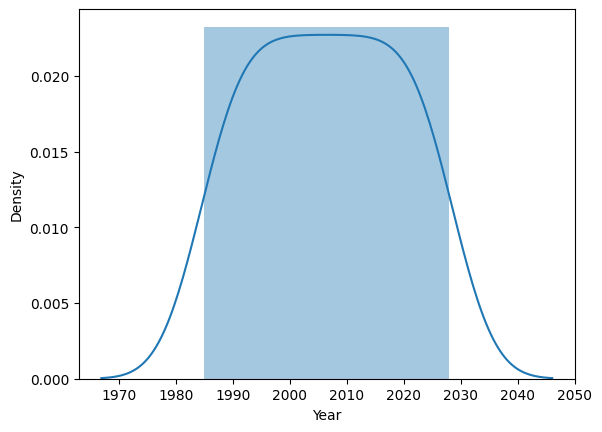

In [110]:
sns.distplot(df['Year'])

<Axes: xlabel='GDP($)', ylabel='Density'>

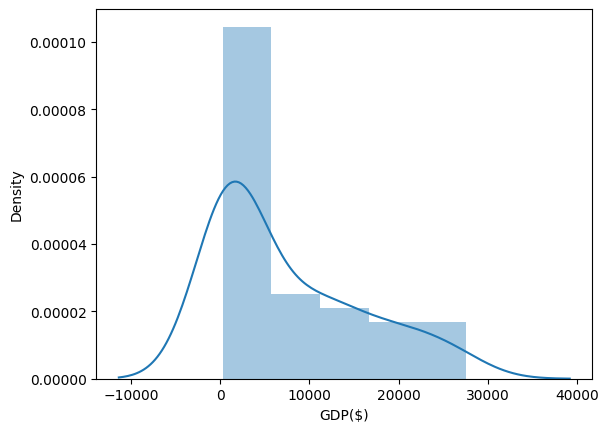

In [111]:
df['GDP($)'] = df['GDP($)'].replace(',', '', regex=True)
df['GDP($)'] = pd.to_numeric(df['GDP($)'], errors='coerce')
sns.distplot(df['GDP($)'].dropna())

In [112]:
df.head()

,Year,GDP($)
0,1985,310.13
1,1986,300.92
2,1987,327.73
3,1988,408.66
4,1989,458.18


In [113]:
df1 = df[['Year','GDP($)']]
df1.head()

,Year,GDP($)
0,1985,310.13
1,1986,300.92
2,1987,327.73
3,1988,408.66
4,1989,458.18


<Axes: xlabel='Year', ylabel='GDP($)'>

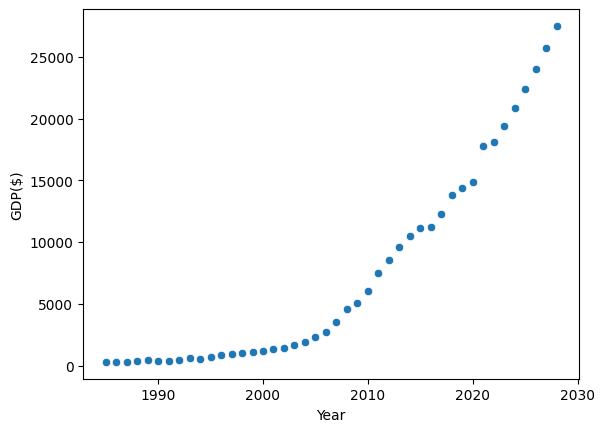

In [114]:
# scatter plot
# scatter plot
sns.scatterplot(x='Year', y='GDP($)', data=df1)

In [115]:
#Model Selection and Estimation
#Linear regression
model = LinearRegression()

In [116]:
#Training the Model
# Split the data into training and testing sets
train_X = df['Year']
train_y = df['GDP($)']

In [117]:
# Fit the model to the training data
train_X = np.array(train_X).reshape(-1, 1)
model.fit(train_X, train_y)

LinearRegression()

In [118]:
# Model Evaluation
# Use the trained model to predict GDP for the testing data
test_X = df['Year']
test_X = np.array(test_X).reshape(-1, 1)
predicted_gdp = model.predict(test_X)

In [119]:
# Evaluate the model's performance
actual_gdp = df['GDP($)']
mae = mean_absolute_error(actual_gdp, predicted_gdp)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2742.2088818950538


In [120]:
#Hyperparameter Tuning
alphas = [0.01, 0.1, 1.0, 10.0]  # Hyperparameter values to test

best_alpha = None
best_mae = float('inf')

for alpha in alphas:
    model = RidgeCV(alphas=[alpha], cv=5)  # RidgeCV automatically performs cross-validation to select the best alpha
    train_X = df['Year']
    train_y = df['GDP($)']
    train_X = np.array(train_X).reshape(-1, 1)
    train_y = np.array(train_y).reshape(-1, 1)
    model.fit(train_X, train_y)
    y_pred = model.predict(train_X)

    mae = mean_absolute_error(train_y, y_pred)
    
    if mae < best_mae:
        best_mae = mae
        best_alpha = alpha

print("Best Alpha:", best_alpha)

Best Alpha: 10.0


In [121]:
#Model Deployment
# Once satisfied with the model's performance, use it to estimate GDP for new data
model = RidgeCV(cv=5) 

In [122]:
new_data = pd.read_csv('C:/Users/bilvi/OneDrive/Desktop/Salary_Data.csv')

In [123]:
X_new = new_data['YearsExperience']

In [124]:
model = RidgeCV(cv=5)  # Create the RidgeCV model
model.fit(train_X, train_y)  # Fit the 
X_new_reshaped = np.array(X_new).reshape(-1, 1)
estimated_gdp = model.predict(X_new_reshaped)

In [125]:
print("Estimated GDP:")
for gdp in estimated_gdp:
    print(gdp)

Estimated GDP:
[-1180074.25720079]
[-1179955.81850339]
[-1179837.37980599]
[-1179541.2830625]
[-1179422.84436511]
[-1179008.30892422]
[-1178949.08957552]
[-1178830.65087813]
[-1178830.65087813]
[-1178534.55413464]
[-1178416.11543724]
[-1178356.89608854]
[-1178356.89608854]
[-1178297.67673984]
[-1178060.79934505]
[-1177823.92195026]
[-1177705.48325286]
[-1177587.04455547]
[-1177231.72846328]
[-1177172.50911458]
[-1176698.754325]
[-1176521.0962789]
[-1176047.34148932]
[-1175869.68344322]
[-1175573.58669973]
[-1175395.92865364]
[-1175099.83191015]
[-1175040.61256145]
[-1174626.07712056]
[-1174507.63842317]
